466.66666666666663

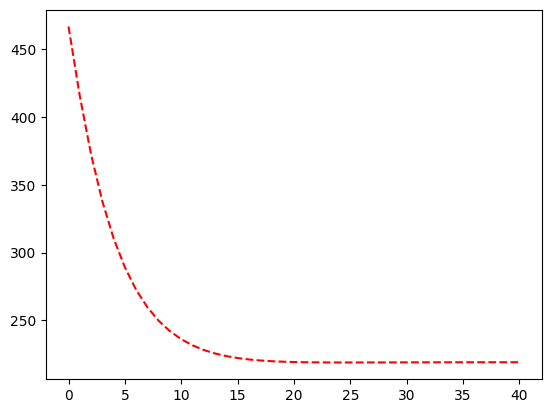

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import torch as t
from scipy.integrate import odeint




BetaiScaled = 10   # Initial rate constant per infected per day
Betai = BetaiScaled/10000

Gammai = 0.25     # Initial recoveries per person per day
kvi = 0         # Initial vaccination rate

Br  = 300                               # Birthrate (all susceptible)
Muall = 0.2                            # Mortality rate
ts=1




# Specify Initial Steady-State Values
# These are the equations for the "interesting" initial steady-states

Si = (Gammai + Muall)/Betai          #Initial Susceptible Population
Ii = Br/(Gammai+Muall)-(Muall+kvi)/Betai    #Initial Infected/Infectious Population

Ri = Br/Muall - Si - Ii               #Initial Removed Population
Ni = Ri+Ii+Si                        #Total Population

display(Ii)

def f(x,t,u):
    S=x[0]
    I=x[1]

    Beta=u[0]
    kv=u[1]
    # the model equations (see Munz et al. 2009)
    f0 = Br - Beta*S*I - Muall*S-kv*S
    f1 = Beta*S*I - Gammai*I - Muall*I
    return [f0, f1]
x0=np.array([Si,Ii])
u0=[Betai,kvi]
Tstop=40
t_space = np.linspace(0,Tstop,int((Tstop/ts)+1))

u=np.zeros([2,int((Tstop/ts)+1)])
u[0][0:10]=0.7406*Betai
u[0][10:]=0.7406*Betai
u[1][0:10]=0.1314+kvi
u[1][10:]=0.1314+kvi


S_t = np.empty_like(t_space)
I_t = np.empty_like(t_space)
S_t[0] = x0[0]
I_t[0] = x0[1]


# solve ODE
for i in range(1,int((Tstop/ts)+1)):
    # span for next time step
    tspan = [t_space[i-1],t_space[i]]
    # solve for next step
    x = odeint(f,x0,tspan,args=(u[:,i],))
    # store solution for plotting
    S_t[i] = x[1][0]
    I_t[i] = x[1][1]
    # next initial condition
    x0 = x[1]



# solve the DEs
# soln = odeint(f, x0, t,args=u)
# S_t = soln[:, 0]
# I_t = soln[:, 1]
# Beta_t = soln[:, 2]
# kv_t = soln[:, 3]
# gamma_t = soln[:, 4]



plt.plot(t_space,I_t,'r--',label='y(t)')

In [46]:
I_t

array([466.66666667, 415.4441358 , 372.41863754, 337.79962056,
       310.49047712, 289.14940468, 272.55154815, 259.68078402,
       249.72602536, 242.04968391, 236.15286055, 231.64505233,
       228.21992371, 225.63658657, 223.70530734, 222.27658151,
       221.23274103, 220.48141821, 219.95040578, 219.58356929,
       219.33756918, 219.17921718, 219.08333651, 219.03103432,
       219.00831061, 219.00493778, 219.0135697 , 219.02903597,
       219.04778941, 219.06747643, 219.08660614, 219.10430013,
       219.12010499, 219.13385253, 219.14555746, 219.155344  ,
       219.16339893, 219.16993496, 219.17516908, 219.17930839,
       219.18254202])

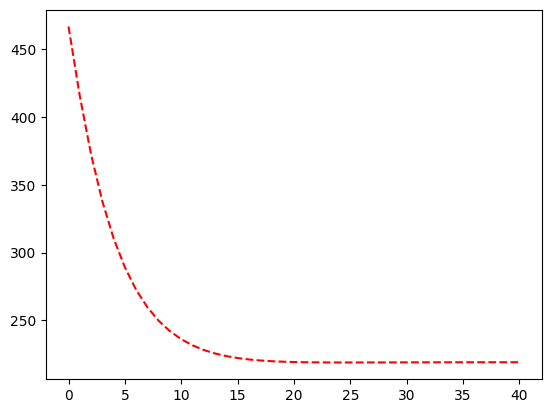

In [47]:

# plt.plot(t_space,S_t,'b-',label='x(t)')
plt.plot(t_space,I_t,'r--',label='y(t)')